# Visualize Results

In [275]:
from rdkit.Chem import MolFromSmiles, AddHs
from rdkit.Chem.Draw.IPythonConsole import ShowMols
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

In [187]:
add_hydrogen = False

In [236]:
def is_interesting(smile):
    if smile.count(')(') >= 3 or smile.count('C') >=14 or (smile.count(')(') == 2 and smile.count('C') >=11):
        return True
    else:
        return False

In [237]:
mols = []
with open('product_smiles.txt', 'r') as readfile:
    while True:
        inp = readfile.readline().strip().split()
        if not inp:
            break
        mf_CO, num_molecules  = inp
        mf_CO = float(mf_CO)
        num_molecules = int(num_molecules)
        print(mf_CO, num_molecules)
        for _ in range(num_molecules):
#             smile = readfile.readline().strip().strip('(')[:-1]
            smile = readfile.readline().strip()
            if is_interesting(smile):
                print(smile)
                mol = Chem.MolFromSmiles(smile)
                if(add_hydrogen):
                    mol = AddHs(mol)
                mols.append(mol)
        print()

0.01 6938

0.02 10948

0.03 14396

0.04 21870

0.05 31856

0.06 58537

0.07 115471

0.08 210082

0.09 352138

0.1 506216

0.11 677176

0.12 867677

0.13 1068652

0.14 1264187

0.15 1456612

0.16 1640137
C(=C)(C)(C(=C)(C))

0.17 1811026
C(C(#C))(C(#C))(=C(=C(=C(=C(=C(=C))))))
C(=C(=C(C(#C))))(=C(=C(C(#C))(C(#C))))
C(=C(C)(C(#C)))(=C(=C(=C(=C(=C(=C(=C)))))))
C(C(=C)(C(#C)))(#C(C(C(#C(C(#C))))(=C)))

0.18 1958698
C(#C)(C(#C(C(#C(C(#C(C(#C(C(#C(C(#C))))))))))))
C(#C(C(#C(C(#C(C(#C(C(#C(C(#C(C(#C)))))))))))))
C(#C(C(#C)))(C(C(#C(C(#C))))(=C(=C)))
C(C(C(#C(C(#C))))(=C(=C(=C(=C)))))(#C)
C(#C)(C(=C(=C))(C(#C(C(#C(C(#C)))))))
C(=C)(C)(C(=C)(C(#C)))
C(#C)(C(#C(C(=C(=C))(C(#C(C(#C)))))))

0.19 2067770
C(=C)(C(C(#C(C(#C(C(#C)))))))(C(#C))
C(C(#C(C(#C))))(#C(C(C(#C))(=C(=C))))
C(#C(C(#C)))(C(=C(C(#C(C(#C(C(#C(C(#C))))))))))
C(#C)(C(=C(=C(=C(=C))))(C(#C(C(=C)))))
C(#C(C(C(#C(C(#C))))(=C(=C(=C(=C))))))(C)
C(=C(=C(C(#C))(C(#C))))(=C(=C(=C(=C(=C)))))
C(=C(=C(=C(=C(=C(C(#C))(C(#C)))))))(=C)
C(#C)(C(C(#C

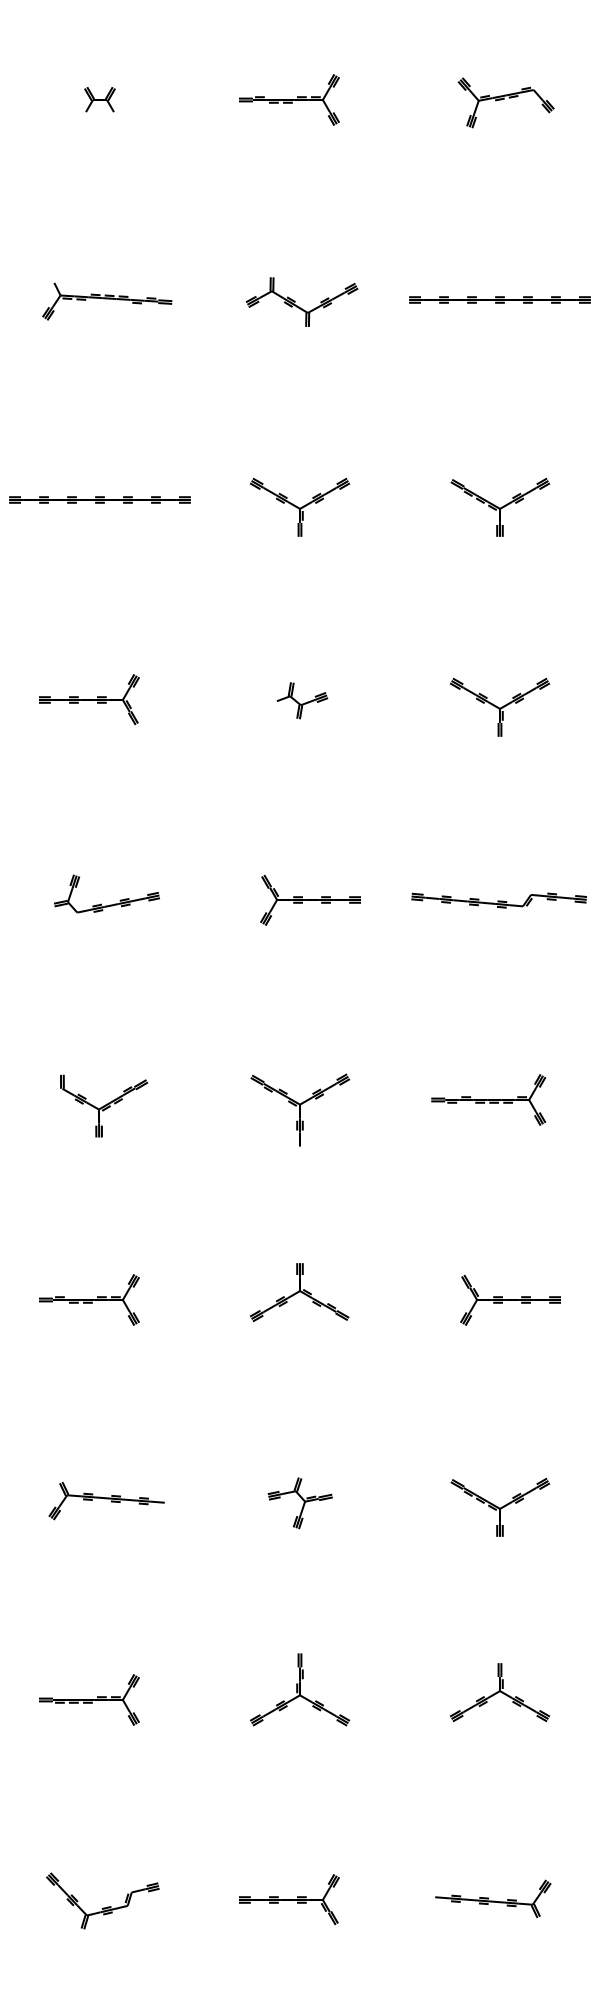

In [238]:
ShowMols(mols)

In [284]:
xs = []
ys = []
zs = []
with open('hydrocarbon_sizes_distribution.txt', 'r') as readfile:
    while True:
        inp = readfile.readline().strip().split()
        if not inp:
            break
        mf_CO, num_keys  = inp
        mf_CO = float(mf_CO)
        num_keys = int(num_keys)
        print(mf_CO, num_keys)
        for _ in range(num_keys):
            try:
                key, val = readfile.readline().strip().split()
                key = int(key)
                val = 100 * float(val) #Multiplied by 100 to convert to percentage
                ys.append(mf_CO)
                xs.append(key)
                zs.append(val)
            except ValueError:
                for __ in range(_):
                    xs.pop()
                    ys.pop()
                    zs.pop()
                break
        print()

0.01 3

0.02 3

0.03 4

0.04 4

0.05 5

0.06 5

0.07 7

0.08 8

0.09 8

0.1 8

0.11 9

0.12 9

0.13 10

0.14 10

0.15 10

0.16 13

0.17 12

0.18 14

0.19 14



<IPython.core.display.Javascript object>


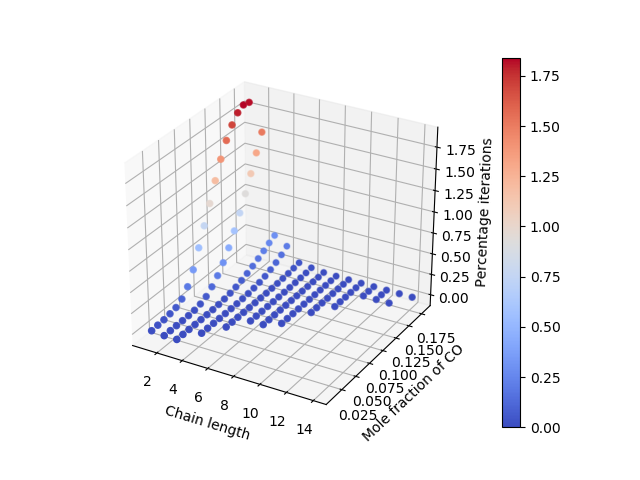

In [286]:
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.scatter(xs, ys, zs, c=zs, cmap=cm.coolwarm)

ax.set_ylabel('Mole fraction of CO')
ax.set_xlabel('Chain length')
ax.set_zlabel('Percentage iterations')

# ax.set_xlim(0, 1)

# Add a color bar which maps values to colors.
fig.colorbar(surf)

plt.show()